# Plot results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_results(file_path):
    # Models we expect
    models = ["MOM", "RANDOM", "JW", "DLCS"]

    # Prepare 4×4 dictionary of lists
    data = {
        model: {
            "runtime": [],
            "splits": [],
            "backtracks": [],
            "recursive": []
        }
        for model in models
    }

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()

            # Skip empty or separator lines
            if not line or line.startswith("-"):
                continue

            # Runtime
            if line.startswith("Runtime"):
                _, rest = line.split("Runtime ", 1)
                model, value = rest.split(": ")
                data[model]["runtime"].append(float(value))

            # Splits
            elif line.startswith("Splits"):
                _, rest = line.split("Splits ", 1)
                model, value = rest.split(": ")
                data[model]["splits"].append(int(value))

            # Backtracks
            elif line.startswith("Backtracks"):
                _, rest = line.split("Backtracks ", 1)
                model, value = rest.split(": ")
                data[model]["backtracks"].append(int(value))

            # Recursive calls
            elif line.startswith("Recursive calls"):
                _, rest = line.split("Recursive calls ", 1)
                model, value = rest.split(": ")
                data[model]["recursive"].append(int(value))

    return data

In [3]:
dataset_files = {
    'uf20-91': 'results/results_20_91.txt',
    'uf50-218-sat': 'results/results_50_218_SAT.txt',
    'uf50-218-unsat': 'results/results_50_218_UNSAT.txt',
    'uf100-430-sat': 'results/results_100_430_SAT.txt', 
    'uf100-430-unsat': 'results/results_100-430_UNSAT.txt'
}

dataset_results = {
    name: parse_results(path)
    for name, path in dataset_files.items()
}


In [4]:
models = ["RANDOM", "DLCS", "JW", "MOM"]
metrics = ["splits", "backtracks", "recursive"]

def compute_metric_stats(dataset_results, metric):
    """
    dataset_results: dict[dataset_name] -> parse_results(...) dict
    metric: one of "splits", "backtracks", "recursive"
    Returns: dataset_names, means, stds
      - dataset_names: list of dataset names in consistent order
      - means: dict[model] -> list of means per dataset (same order)
      - stds:  dict[model] -> list of stds per dataset (same order)
    """
    dataset_names = list(dataset_results.keys())

    means = {m: [] for m in models}
    stds = {m: [] for m in models}

    for ds in dataset_names:
        res = dataset_results[ds]
        for m in models:
            values = np.array(res[m][metric])
            means[m].append(values.mean())
            stds[m].append(values.std(ddof=1))  

    return dataset_names, means, stds

In [5]:
dataset_names, means_split, stds_split = compute_metric_stats(dataset_results, "splits")
print(dataset_names)
print('-------')
print(means_split)
print('-------')
print(stds_split)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat']
-------
{'RANDOM': [np.float64(11.593), np.float64(174.456), np.float64(470.514), np.float64(18641.196), np.float64(57359.139)], 'DLCS': [np.float64(5.968), np.float64(23.908), np.float64(58.387), np.float64(302.945), np.float64(980.785)], 'JW': [np.float64(5.421), np.float64(17.069), np.float64(35.573), np.float64(127.681), np.float64(376.765)], 'MOM': [np.float64(5.577), np.float64(16.991), np.float64(31.647), np.float64(119.484), np.float64(314.406)]}
-------
{'RANDOM': [np.float64(6.736819407979981), np.float64(150.90670925740477), np.float64(145.99903260474542), np.float64(18275.6120183218), np.float64(18243.552887242895)], 'DLCS': [np.float64(2.4631368299473424), np.float64(18.532970808993547), np.float64(21.30190137058197), np.float64(337.0470363015816), np.float64(424.21549424857244)], 'JW': [np.float64(1.9061459525420377), np.float64(10.526872947559216), np.float64(10.673827879519212), np.float64

In [6]:
dataset_names, means_backtracks, stds_backtracks = compute_metric_stats(dataset_results, "backtracks")
print(dataset_names)
print('-------')
print(means_backtracks)
print('-------')
print(stds_backtracks)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat']
-------
{'RANDOM': [np.float64(14.022), np.float64(331.125), np.float64(941.028), np.float64(37250.674), np.float64(114718.278)], 'DLCS': [np.float64(3.731), np.float64(32.559), np.float64(116.774), np.float64(580.548), np.float64(1961.57)], 'JW': [np.float64(2.71), np.float64(19.58), np.float64(71.146), np.float64(231.139), np.float64(753.53)], 'MOM': [np.float64(2.88), np.float64(19.217), np.float64(63.294), np.float64(214.238), np.float64(628.812)]}
-------
{'RANDOM': [np.float64(13.690688476148706), np.float64(302.6901000556042), np.float64(291.99806520949085), np.float64(36551.95038556373), np.float64(36487.10577448579)], 'DLCS': [np.float64(5.067772816664272), np.float64(37.6266698670675), np.float64(42.60380274116394), np.float64(675.3687353028897), np.float64(848.4309884971449)], 'JW': [np.float64(3.8411788105547306), np.float64(21.858027664301584), np.float64(21.347655759038425), np.float64(252.3

In [7]:
dataset_names, means_recursive, stds_recursive = compute_metric_stats(dataset_results, "recursive")
print(dataset_names)
print('-------')
print(means_recursive)
print('-------')
print(stds_recursive)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat']
-------
{'RANDOM': [np.float64(20.704), np.float64(343.241), np.float64(942.028), np.float64(37271.458), np.float64(114719.278)], 'DLCS': [np.float64(9.273), np.float64(42.183), np.float64(117.774), np.float64(595.932), np.float64(1962.57)], 'JW': [np.float64(8.137), np.float64(28.706), np.float64(72.146), np.float64(245.716), np.float64(754.53)], 'MOM': [np.float64(8.432), np.float64(28.478), np.float64(64.294), np.float64(229.177), np.float64(629.812)]}
-------
{'RANDOM': [np.float64(13.914956342368091), np.float64(302.6902150471424), np.float64(291.99806520949085), np.float64(36552.09146635526), np.float64(36487.10577448579)], 'DLCS': [np.float64(5.08943743191459), np.float64(37.63692401152157), np.float64(42.60380274116394), np.float64(675.1210601231618), np.float64(848.4309884971449)], 'JW': [np.float64(3.7895371210204014), np.float64(21.668804791706926), np.float64(21.347655759038425), np.float64(25

In [8]:
def plot_metric(dataset_results, metric):
    dataset_names, means, stds = compute_metric_stats(dataset_results, metric)

    x = np.arange(len(dataset_names))  # positions for datasets
    width = 0.18                       # bar width

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, m in enumerate(models):
        x_positions = x + (i - (len(models) - 1) / 2) * width
        ax.bar(
            x_positions,
            means[m],
            width,
            yerr=stds[m],
            capsize=5,
            label=m
        )

    ax.set_yscale("log")
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_names, rotation=45, ha="right")
    ax.set_xlabel("Dataset")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{metric.capitalize()} by heuristic and dataset")
    ax.legend(title="Heuristic")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    fig.tight_layout()
    plt.show()


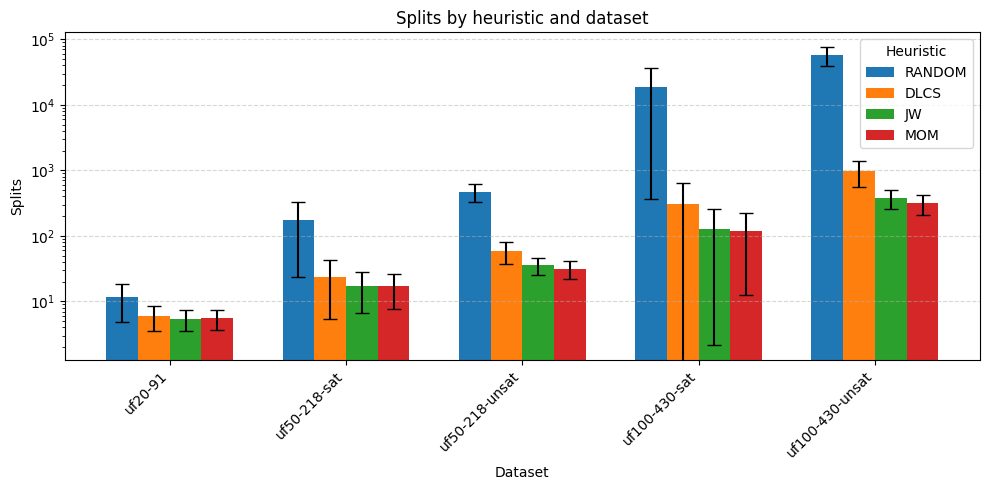

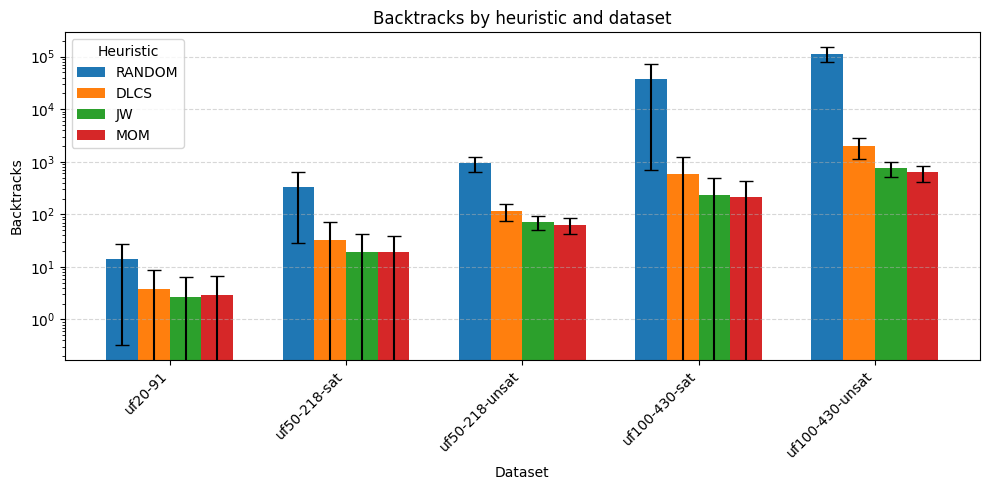

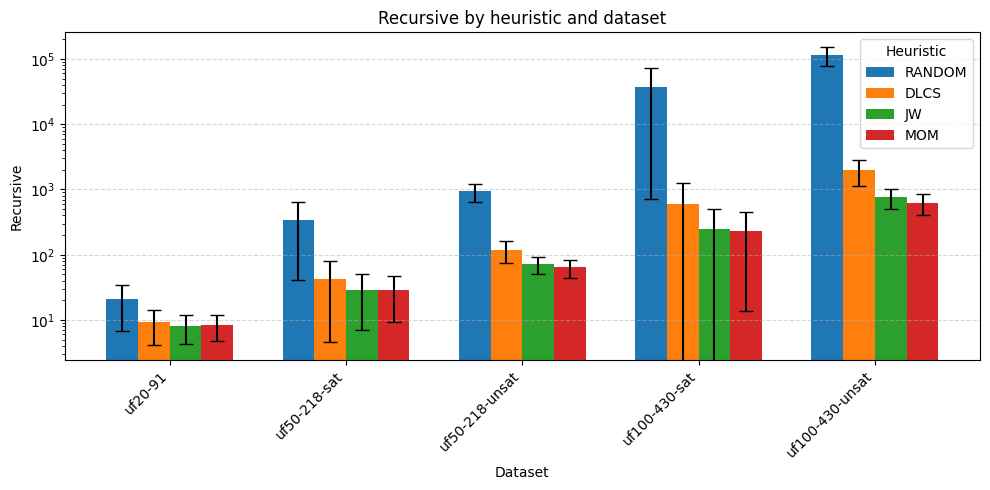

In [9]:
for metric in metrics:
    plot_metric(dataset_results, metric)

In [10]:
models = ["DLCS", "JW", "MOM"]
metrics = ["splits", "backtracks", "recursive"]

def compute_metric_stats(dataset_results, metric):
    """
    dataset_results: dict[dataset_name] -> parse_results(...) dict
    metric: one of "splits", "backtracks", "recursive"
    Returns: dataset_names, means, stds
      - dataset_names: list of dataset names in consistent order
      - means: dict[model] -> list of means per dataset (same order)
      - stds:  dict[model] -> list of stds per dataset (same order)
    """
    dataset_names = list(dataset_results.keys())

    means = {m: [] for m in models}
    stds = {m: [] for m in models}

    for ds in dataset_names:
        res = dataset_results[ds]
        for m in models:
            values = np.array(res[m][metric])
            means[m].append(values.mean())
            stds[m].append(values.std(ddof=1))  

    return dataset_names, means, stds

In [11]:
dataset_names, means_split, stds_split = compute_metric_stats(dataset_results, "splits")
print(dataset_names, means_split, stds_split)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat'] {'DLCS': [np.float64(5.968), np.float64(23.908), np.float64(58.387), np.float64(302.945), np.float64(980.785)], 'JW': [np.float64(5.421), np.float64(17.069), np.float64(35.573), np.float64(127.681), np.float64(376.765)], 'MOM': [np.float64(5.577), np.float64(16.991), np.float64(31.647), np.float64(119.484), np.float64(314.406)]} {'DLCS': [np.float64(2.4631368299473424), np.float64(18.532970808993547), np.float64(21.30190137058197), np.float64(337.0470363015816), np.float64(424.21549424857244)], 'JW': [np.float64(1.9061459525420377), np.float64(10.526872947559216), np.float64(10.673827879519212), np.float64(125.50254231340148), np.float64(123.3992185637419)], 'MOM': [np.float64(1.9083272027387528), np.float64(9.295554116152857), np.float64(10.090699342127543), np.float64(107.15471934487009), np.float64(109.03129361328787)]}


In [12]:
dataset_names, means_backtracks, stds_backtracks = compute_metric_stats(dataset_results, "backtracks")
print(dataset_names, means_backtracks, stds_backtracks)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat'] {'DLCS': [np.float64(3.731), np.float64(32.559), np.float64(116.774), np.float64(580.548), np.float64(1961.57)], 'JW': [np.float64(2.71), np.float64(19.58), np.float64(71.146), np.float64(231.139), np.float64(753.53)], 'MOM': [np.float64(2.88), np.float64(19.217), np.float64(63.294), np.float64(214.238), np.float64(628.812)]} {'DLCS': [np.float64(5.067772816664272), np.float64(37.6266698670675), np.float64(42.60380274116394), np.float64(675.3687353028897), np.float64(848.4309884971449)], 'JW': [np.float64(3.8411788105547306), np.float64(21.858027664301584), np.float64(21.347655759038425), np.float64(252.33248971221357), np.float64(246.7984371274838)], 'MOM': [np.float64(3.7322284937459993), np.float64(19.547071366294208), np.float64(20.181398684255086), np.float64(215.57111648424114), np.float64(218.06258722657574)]}


In [13]:
dataset_names, means_recursive, stds_recursive = compute_metric_stats(dataset_results, "recursive")
print(dataset_names, means_recursive, stds_recursive)

['uf20-91', 'uf50-218-sat', 'uf50-218-unsat', 'uf100-430-sat', 'uf100-430-unsat'] {'DLCS': [np.float64(9.273), np.float64(42.183), np.float64(117.774), np.float64(595.932), np.float64(1962.57)], 'JW': [np.float64(8.137), np.float64(28.706), np.float64(72.146), np.float64(245.716), np.float64(754.53)], 'MOM': [np.float64(8.432), np.float64(28.478), np.float64(64.294), np.float64(229.177), np.float64(629.812)]} {'DLCS': [np.float64(5.08943743191459), np.float64(37.63692401152157), np.float64(42.60380274116394), np.float64(675.1210601231618), np.float64(848.4309884971449)], 'JW': [np.float64(3.7895371210204014), np.float64(21.668804791706926), np.float64(21.347655759038425), np.float64(252.0192513421287), np.float64(246.7984371274838)], 'MOM': [np.float64(3.694187735216366), np.float64(19.28220213874233), np.float64(20.181398684255086), np.float64(215.2783650194451), np.float64(218.06258722657574)]}


In [14]:
def plot_metric(dataset_results, metric):
    dataset_names, means, stds = compute_metric_stats(dataset_results, metric)

    x = np.arange(len(dataset_names))  # positions for datasets
    width = 0.18                       # bar width

    fig, ax = plt.subplots(figsize=(10, 5))

    for i, m in enumerate(models):
        x_positions = x + (i - (len(models) - 1) / 2) * width
        ax.bar(
            x_positions,
            means[m],
            width,
            yerr=stds[m],
            capsize=5,
            label=m
        )

    ax.set_xticks(x)
    ax.set_xticklabels(dataset_names, rotation=45, ha="right")
    ax.set_xlabel("Dataset")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{metric.capitalize()} by heuristic and dataset")
    ax.legend(title="Heuristic")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    fig.tight_layout()
    plt.show()

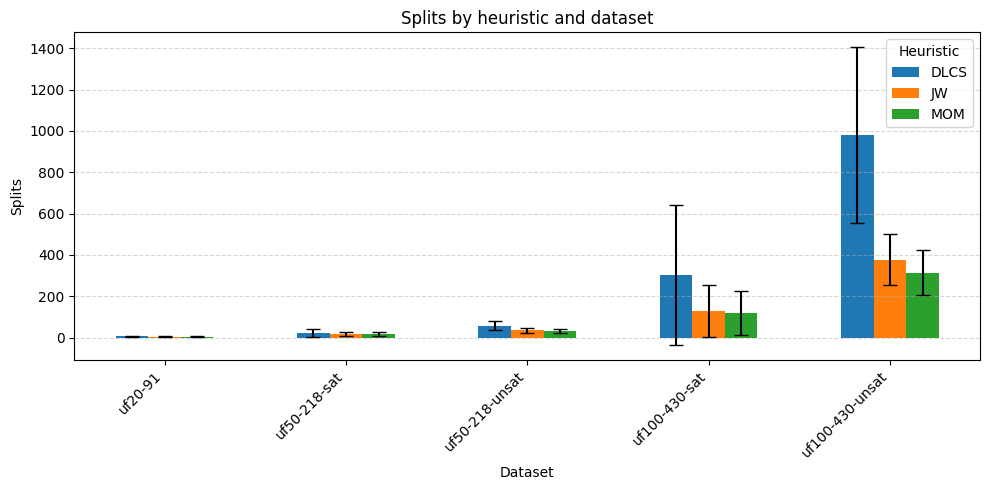

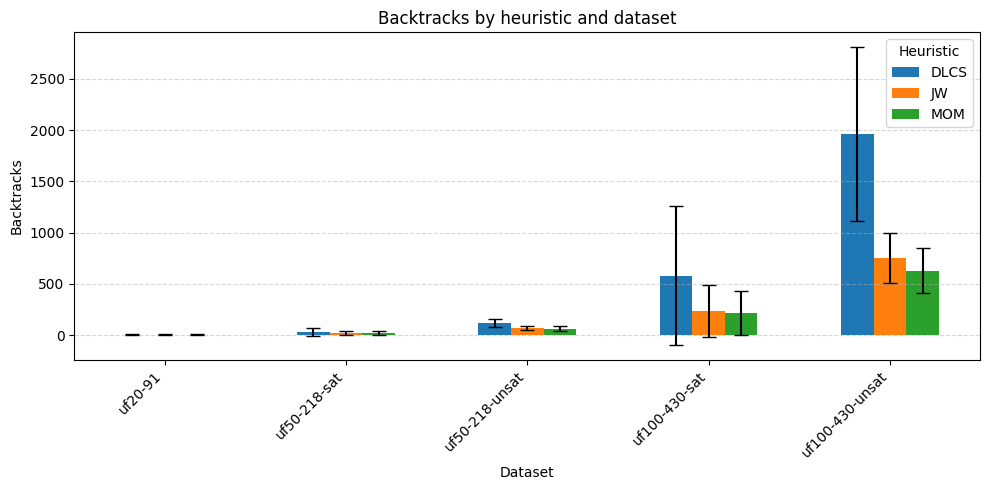

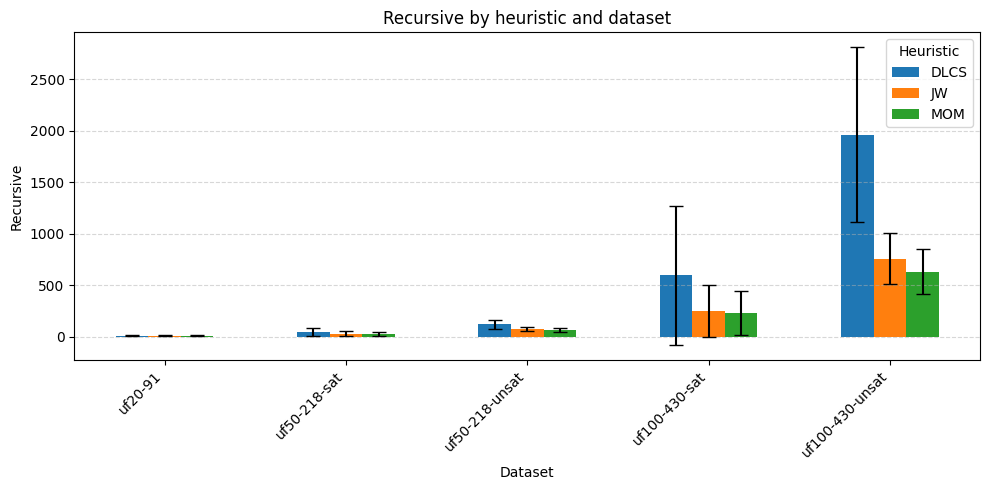

In [15]:
for metric in metrics:
    plot_metric(dataset_results, metric)

## Statistical test


### Wilcoxon Signed Ranked Test

In [16]:
from scipy.stats import wilcoxon
import numpy as np

def wilcoxon_compare(dataset_results, dataset_name, metric, model_a, model_b):
    """
    Returns (statistic, p-value)
    """
    a_vals = np.array(dataset_results[dataset_name][model_a][metric])
    b_vals = np.array(dataset_results[dataset_name][model_b][metric])

    # sanity: paired lengths must match
    assert len(a_vals) == len(b_vals)

    # Wilcoxon signed-rank (paired non-parametric)
    stat, p = wilcoxon(a_vals, b_vals)

    return stat, p


In [17]:
models = [ "RANDOM","DLCS",  "JW", "MOM",]
metrics = ["splits", "backtracks", "recursive"]

for dataset_name in dataset_results:
    print(f"\n=== Dataset: {dataset_name} ===")
    for metric in metrics:
        print(f"\n Metric = {metric}")
        for i in range(len(models)):
            for j in range(i+1, len(models)):
                a = models[i]
                b = models[j]
                stat, p = wilcoxon_compare(dataset_results, dataset_name, metric, a, b)
                print(f" {a} vs {b}: p = {p:.4g}")



=== Dataset: uf20-91 ===

 Metric = splits
 RANDOM vs DLCS: p = 2.511e-99
 RANDOM vs JW: p = 6.878e-117
 RANDOM vs MOM: p = 7.732e-112
 DLCS vs JW: p = 1.321e-23
 DLCS vs MOM: p = 8.472e-06
 JW vs MOM: p = 0.001418

 Metric = backtracks
 RANDOM vs DLCS: p = 3.201e-87
 RANDOM vs JW: p = 8.215e-107
 RANDOM vs MOM: p = 1.456e-104
 DLCS vs JW: p = 4.988e-29
 DLCS vs MOM: p = 1.036e-07
 JW vs MOM: p = 0.02674

 Metric = recursive
 RANDOM vs DLCS: p = 2.145e-98
 RANDOM vs JW: p = 1.19e-118
 RANDOM vs MOM: p = 1.4e-114
 DLCS vs JW: p = 4.419e-29
 DLCS vs MOM: p = 3.284e-06
 JW vs MOM: p = 0.0004095

=== Dataset: uf50-218-sat ===

 Metric = splits
 RANDOM vs DLCS: p = 3.611e-151
 RANDOM vs JW: p = 5.719e-158
 RANDOM vs MOM: p = 4.019e-159
 DLCS vs JW: p = 1.602e-80
 DLCS vs MOM: p = 1.992e-36
 JW vs MOM: p = 0.6859

 Metric = backtracks
 RANDOM vs DLCS: p = 2.522e-149
 RANDOM vs JW: p = 4.295e-157
 RANDOM vs MOM: p = 3.402e-157
 DLCS vs JW: p = 5.738e-73
 DLCS vs MOM: p = 7.487e-32
 JW vs MOM

In [ ]:
def cliffs_delta(a, b):
    """
    Returns delta in [-1, 1]
    """
    a = np.array(a)
    b = np.array(b)
    
    n = len(a)
    m = len(b)
    
    greater = sum(x > y for x in a for y in b)
    less    = sum(x < y for x in a for y in b)

    delta = (greater - less) / (n*m)
    return delta


In [ ]:
delta = cliffs_delta(a_vals, b_vals)
print("Cliff's delta:", delta)
